In [1]:
!pip install geopandas matplotlib shapely cdsapi numpy xarray rioxarray netcdf4 scipy pandas catboost scikit-learn

In [2]:
import geopandas as gpd

download hydrobasins data and pick the right catchements

* if the catchment is NOT endoreic then you should see where water comes from that leads into MBO catchment
* plot catchement, and possible connected catchments, on a map

* YAY, its endoreic. haha. that makes it less complicated.

In [4]:
df = gpd.read_file('hybas_eu_lev06_v1c/hybas_eu_lev06_v1c.shp')

In [6]:
df.head()

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,2060000010,0,2060000010,2060000010,0.0,0.0,5.1,5.1,211011,0,1,0,1,"POLYGON ((32.32083 31.26667, 32.31250 31.26667..."
1,2060000020,0,2060000020,2060000020,0.0,0.0,6264.2,6264.2,211012,0,0,1,2,"POLYGON ((32.97500 30.33333, 32.97559 30.33084..."
2,2060000030,0,2060000030,2060000030,0.0,0.0,7763.3,7763.3,211013,0,1,0,3,"MULTIPOLYGON (((33.35278 31.16250, 33.34253 31..."
3,2060000240,0,2060000240,2060000240,0.0,0.0,23856.9,23856.9,211014,0,0,1,4,"POLYGON ((34.42917 29.78750, 34.42982 29.78014..."
4,2060000250,0,2060000250,2060000250,0.0,0.0,1955.1,1955.1,211015,0,1,0,5,"POLYGON ((34.08750 31.24583, 34.08835 31.24915..."


<Axes: >

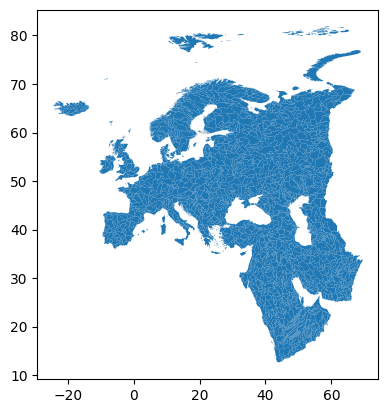

In [9]:
df.plot()

In [11]:
from shapely.geometry import Point
 
latitude = 22.881300
longitude = 58.700600
point = Point(longitude, latitude)
selected = df[df.contains(point)]


In [12]:
selected

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
1628,2060077240,0,2060077240,2060077240,0.0,0.0,6903.2,6903.2,295308,0,0,1,1629,"POLYGON ((58.35417 22.77917, 58.35351 22.78660..."


<Axes: >

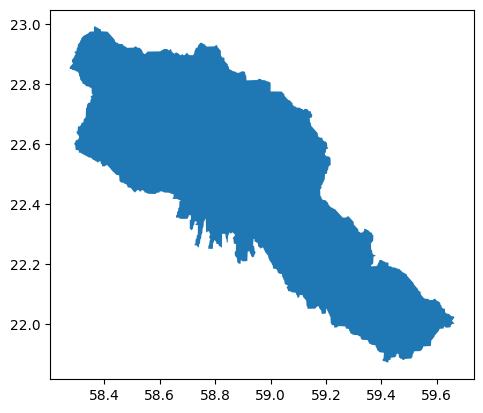

In [13]:
selected.plot()

download era5-land data (precipitation, temperature) for January 2019 - March 2020

* plot cumulative precipitation for hydrophone/geophone deployment
* plot daily temperature for hydrophone/geophone deployment
* plot map of precipitation
* plot map of temperatureg

check the global surface water data if there is water in the river basin that is nearby...na